### Food Access and Social Determinants of Health Affecting Obesity Rates
*Github link:*

---


**The Team:** Nina Moore, Amy Le Nguyen

**Project Goals:** The goal of this project is to analyze how various socioeconomic factors play a role in obesity across the United States. How do access to grocery stores and restaurants contribute to obesity metrics? Do median household income or statewide percentage of households with food stamps correlate with obesity? Are certain populations more or less affected by obesity?

**Preliminary Datasets:**
*   *National Obesity Percentages by State (Data.gov):* Lists percentages of state population considered obese from a 2015 CDC survey. This serves as the basis for our data analysis.
*   *Social Determinants of Health Database (Agency for Healthcare Research and Quality):* A dataset with measures of 330 social determinants of health across all 50 states, with specificity by county, in 2020. We plan to look at race, median household income, percentage of households that have food stamps, etc.

Later, we hope to incorporatethe USDA's Food Environmental Atlas, which measures access to food statewide for all 50 states. It considers variables like grocery stores, dollar stores, fast food restaurants, sit-down restaurants in the county.

**Collaboration Plan:** We plan to meet every week at least once. For now, we'll meet every Thursday and will meet more as needed.

In [ ]:
# run program to access files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# change directory
%cd /content/drive/MyDrive/Colab Notebooks/Data Science Project

/content/drive/MyDrive/Colab Notebooks/Data Science Project


In [ ]:
# load in 'National Obesity Percentages by State' dataset
obesity_percents_df = pd.read_csv('obesity_perc.csv')
obesity_percents_df.head()

,,,,Obesity_Percentages_by_State
OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
1,Texas,32.4,7672329221282.43,15408321.8693326
2,California,24.2,5327809415348.82,14518698.4569941
3,Kentucky,34.6,1128830286205.16,6346698.58640708
4,Georgia,30.7,1652980281878.16,5795595.91864916


The Social Determinants of Health Database is 85530 x 330. Instead of loading in such a large database every time, we'll load in the variables of interest:

*   State
*   Percent American Indian and Native American
*   Percent Asian
*   Percent Black
*   Percent Native Hawaiian and Pacific Islander
*   Percent White
*   Percent Unemployed
*   Median Household Income
*   Percent of Households with Food Stamps
*   Percent of Households with Food Stamps Below the Poverty Line

The original dataset also included U.S. territories, which were dropped, as we are only considering the 50 states.

In [ ]:
# load in 'Social Determinants of Health Database'
# only consider columns with variables of interest
sdoh_df = pd.read_csv('SDOH_2020.csv', usecols=['STATE', 'ACS_PCT_AIAN_COMB',
                       'ACS_PCT_ASIAN_COMB', 'ACS_PCT_BLACK_COMB',
                       'ACS_PCT_NHPI_COMB', 'ACS_PCT_WHITE_COMB',
                       'ACS_PCT_UNEMPLOY', 'ACS_MEDIAN_HH_INC',
                       'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_HH_FOOD_STMP_BLW_POV']
                        )
# drop US territories
territories = ['Puerto Rico', 'Guam', 'American Samoa',
               'Northern Mariana Islands', 'US Virgin Islands']
sdoh_df = sdoh_df[~sdoh_df['STATE'].isin(territories)]

sdoh_df.head()

,STATE,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_UNEMPLOY,ACS_MEDIAN_HH_INC,ACS_PCT_HH_FOOD_STMP,ACS_PCT_HH_FOOD_STMP_BLW_POV
0,Alabama,2.37,2.37,16.07,0.00,85.78,2.11,60388.0,19.48,10.10
1,Alabama,0.63,1.99,59.93,1.37,39.27,4.04,49144.0,22.51,13.61
2,Alabama,0.41,2.54,29.56,0.00,64.37,2.66,62423.0,10.44,6.59
3,Alabama,0.31,2.37,9.81,0.00,90.51,2.35,64310.0,4.34,0.67
4,Alabama,0.35,1.86,15.63,0.00,82.51,0.99,87664.0,9.26,8.73


We want to look at food stamp usage across each state. Since the original database separates information by county, which we will ignore, we need to group each variable of interest by state and consider only the percent of households with food stamps. We'll take the average in order to take the average percentage of food stamp usage across all the counties and find which states have the highest and lowest percentage of households with foodstamps.

In [ ]:
# group dataset by state and consider food stamps usage
# find the mean to get the state average (average across all counties)
avg_food_stamps = sdoh_df.groupby('STATE')['ACS_PCT_HH_FOOD_STMP'].mean()

# find state with the highest percentage
print('State with Highest Percentage of Households with Foodstamps:',
      avg_food_stamps.idxmax(), ',', round(avg_food_stamps.max(), 2), '%')
# find state with the lowest percentage
print('State with Lowest Percentage of Households with Foodstamps:',
      avg_food_stamps.idxmin(), ',', round(avg_food_stamps.min(), 2), '%')

# get a look at the first few states
avg_food_stamps.head()

State with Highest Percentage of Households with Foodstamps: New Mexico , 17.66 %
State with Lowest Percentage of Households with Foodstamps: Wyoming , 5.43 %


,ACS_PCT_HH_FOOD_STMP
STATE,
Alabama,14.729650
Alaska,11.484343
Arizona,11.191476
Arkansas,12.569257
California,9.754019


The same process is repeated: taking the average across all the counties to find the median household income for each state. We'll locate where and find the highest and lowest median households incomes in America.

In [ ]:
# group social determinants of health dataset by state
# only consider the median household income variable and find the mean
avg_income = sdoh_df.groupby('STATE')['ACS_MEDIAN_HH_INC'].mean()

# find state with highest median household income
print('State with Highest Median Household Income:', avg_income.idxmax(),
      ', $', round(avg_income.max(), 2))
# find state with lowest median household income
print('State with Lowest Median Household Income:', avg_income.idxmin(),
      ', $', round(avg_income.min(), 2))

# get a look at the first few states
avg_income.head()

State with Highest Median Household Income: District of Columbia , $ 100791.64
State with Lowest Median Household Income: Mississippi , $ 48349.96


,ACS_MEDIAN_HH_INC
STATE,
Alabama,52977.538678
Alaska,76906.350575
Arizona,66446.709491
Arkansas,50555.761029
California,85630.555543


To get a feel for how median household income might correlate with food access, which has implications on obesity, we'll plot our median household income data against our percentage of households with food stamps. Does median income in the state correlate with how prevalent food stamps are? Later, we'll see if this matches up with obesity and food stamps metrics.

Text(0.5, 1.0, 'Median Household Income ($) vs. Food Stamps Prevalence')

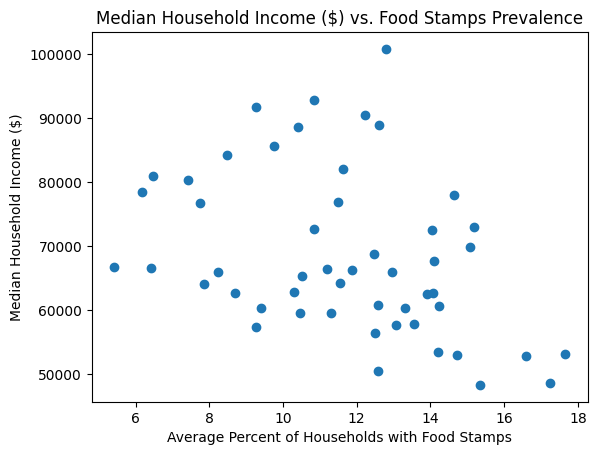

In [ ]:
# plot percentage of households with food stamps against median household income
plt.scatter(avg_food_stamps, avg_income)
plt.xlabel('Average Percent of Households with Food Stamps')
plt.ylabel('Median Household Income ($)')
plt.title('Median Household Income ($) vs. Food Stamps Prevalence')

Just looking at the graph, there seems to be a negative correlation between median household income and percentage of households with food stamps. That is, as median household income increases, the average percent of households with foodstamps decreases. In reality, this means that states with lower median household incomes often have higher percentages of households on food stamps. Soon, we will explore how obesity correlates with both of these variables, but this exploratory analysis gives insight on how wealth affects food access.

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/drive/MyDrive/Colab Notebooks/Data Science Project/Moore_Nguyen_Data_Science_Project.ipynb